In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, pylab, scipy.stats as stats
from sklearn.linear_model import LinearRegression, BayesianRidge

In [2]:
train = pd.read_csv('train.csv')
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
test = pd.read_csv('test.csv')
test.head(10), test.shape

(     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
 1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
 2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
 3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
 4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
 5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
 6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
 7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
 8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
 9  1470          20       RL         70.0     8400   Pave   NaN      Reg   
 
   LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
 0         Lvl    AllPub      ...               120        0    NaN  MnPr

In [4]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
train.columns, test.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A7C993160>,
      dtype=object)

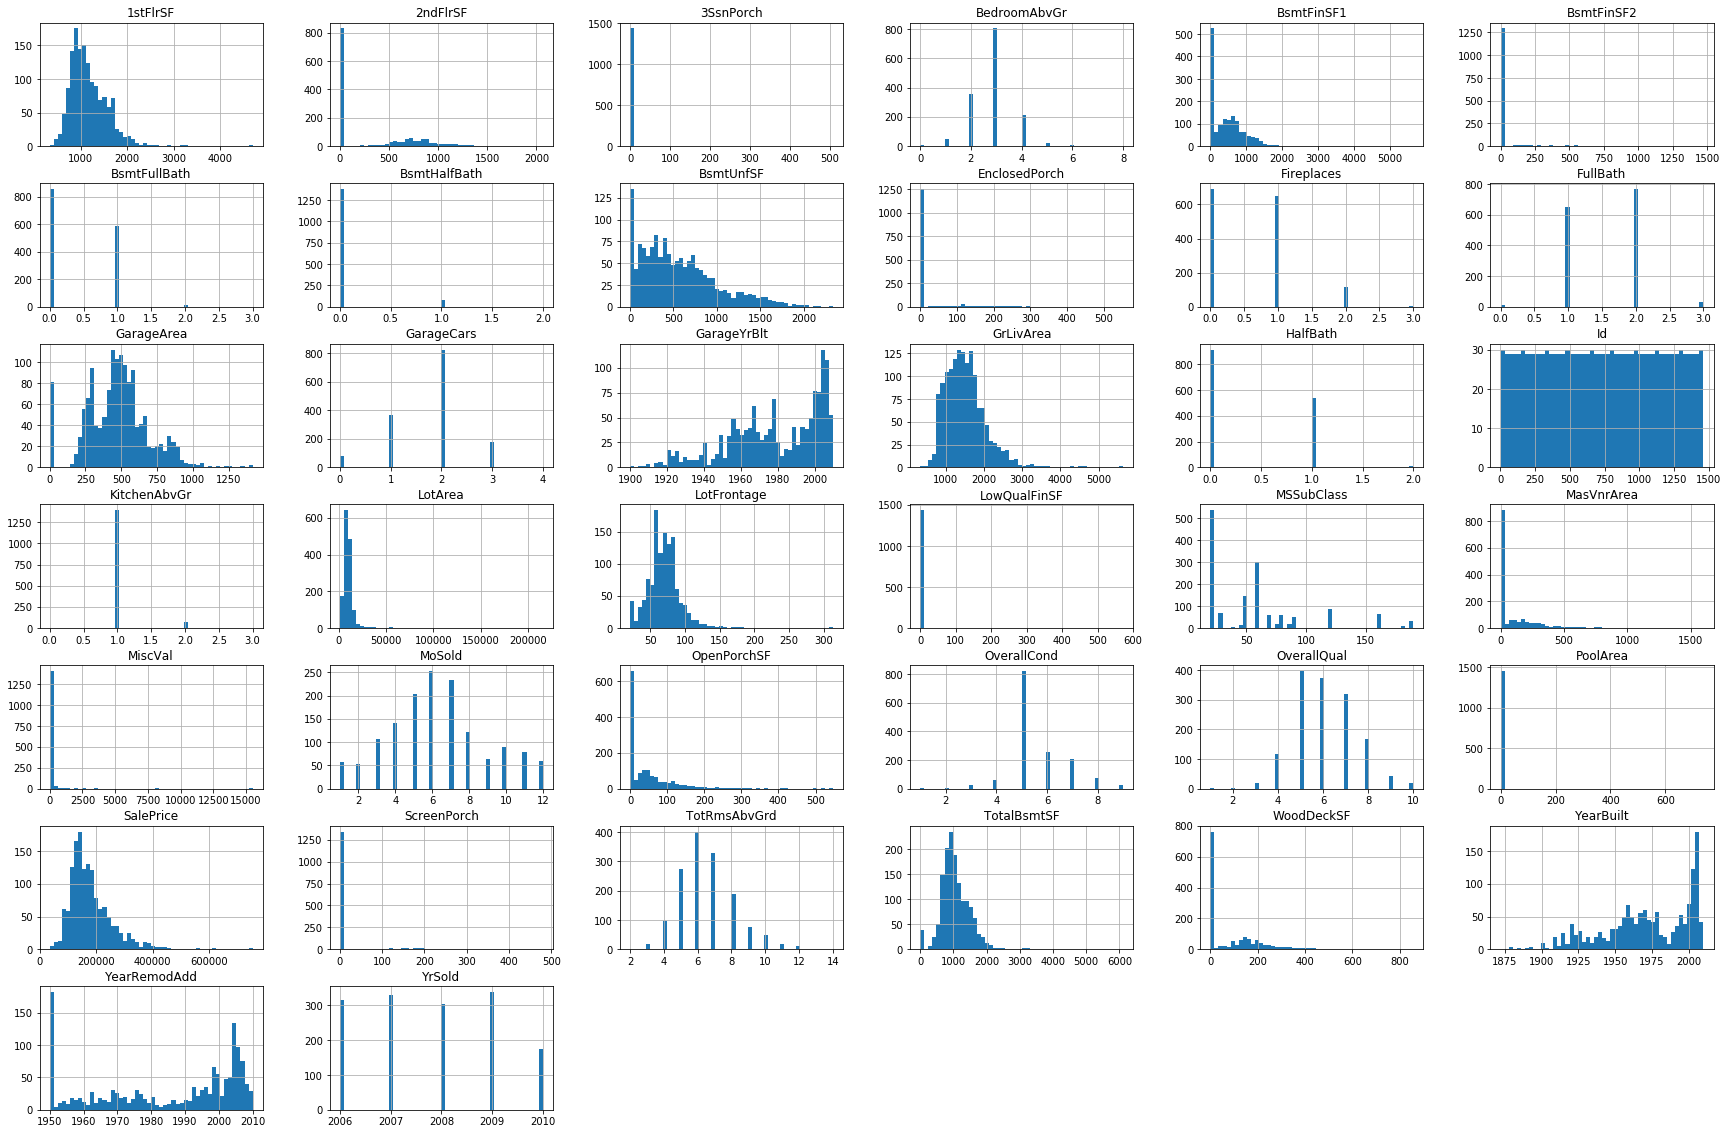

In [7]:
train.hist(bins=50, figsize=(30,20))

In [8]:
train.dropna(how='all', inplace = True)
train.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.472603
GarageType  

In [9]:
train.drop(train[train['GarageYrBlt'].isnull()].index, axis = 0, inplace = True)
train.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.182741
LotArea          0.000000
Street           0.000000
Alley            0.940537
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005801
MasVnrArea       0.005801
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.448151
GarageType  

In [10]:
train.drop(train[train['MasVnrArea'].isnull()].index, axis = 0, inplace = True)
train.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.182349
LotArea          0.000000
Street           0.000000
Alley            0.940919
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.447848
GarageType  

In [11]:
train.corr().style.background_gradient()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1,0.020103,-0.0132886,-0.0347269,-0.0468547,0.00757024,-0.0227821,-0.0278534,-0.0539726,-0.00635377,-0.00680015,-0.0104146,-0.0198713,0.00902856,-0.000358486,-0.0470585,0.00275025,0.0087804,-0.0279588,0.00173221,-0.00984345,0.0416025,0.0204713,0.0267748,-0.019423,-0.00222339,0.00938243,0.0101912,-0.030307,-0.00619116,0.00329771,-0.0483612,0.000932151,0.0587924,-0.00478924,0.0132655,0.0109369,-0.0312122
MSSubClass,0.020103,1,-0.38694,-0.134271,0.0520929,-0.0993934,0.0606245,0.0372834,0.0337781,-0.0677074,-0.0798621,-0.136835,-0.240887,-0.252182,0.307806,0.0200766,0.0748424,-0.0110844,0.000234415,0.129273,0.196619,-0.0566102,0.247579,0.0239563,-0.0250203,0.0859691,0.0127292,-0.0659037,-0.00923935,-0.00102205,-0.0205736,-0.0441943,-0.0221195,0.0102313,-0.0221001,-0.017137,-0.023214,-0.0761774
LotFrontage,-0.0132886,-0.38694,1,0.421184,0.241322,-0.0463116,0.109726,0.086414,0.189969,0.241352,0.0493053,0.115306,0.38762,0.451085,0.0750038,0.0111481,0.396306,0.118088,0.000433573,0.185785,0.0456783,0.270404,-0.00354647,0.348421,0.260321,0.0698781,0.286587,0.356851,0.0821656,0.161815,0.014261,0.0697158,0.035906,0.211746,0.00147074,0.0188145,0.0132671,0.34427
LotArea,-0.0347269,-0.134271,0.421184,1,0.0905946,0.000666552,-0.00437746,0.00421828,0.096315,0.209126,0.110511,-0.0113812,0.25044,0.287818,0.0482468,0.0102889,0.255225,0.160654,0.0467971,0.113389,0.00782957,0.117687,-0.0204895,0.183589,0.263323,-0.0241222,0.137875,0.168129,0.168084,0.0867598,-0.0183766,0.0185862,0.0389364,0.0770798,0.0404428,0.00153467,-0.0124658,0.253793
OverallQual,-0.0468547,0.0520929,0.241322,0.0905946,1,-0.135286,0.570995,0.556807,0.40312,0.220754,-0.0721319,0.320169,0.531361,0.468264,0.289329,-0.0141332,0.591238,0.106344,-0.0560287,0.55829,0.262916,0.0862292,-0.173905,0.43027,0.384095,0.54651,0.580304,0.526372,0.229031,0.313464,-0.105486,0.0249701,0.0520919,0.0649004,-0.0288033,0.0631422,-0.0168615,0.786212
OverallCond,0.00757024,-0.0993934,-0.0463116,0.000666552,-0.135286,1,-0.404732,0.049623,-0.135258,-0.0462762,0.0377722,-0.140883,-0.177966,-0.141426,0.0149996,0.0429444,-0.08894,-0.0581297,0.121081,-0.214591,-0.0630381,0.016473,-0.0944612,-0.066909,-0.0226478,-0.324241,-0.246913,-0.196784,-0.00704091,-0.0517298,0.0680263,0.026354,0.0566181,-0.00254904,0.0789826,-0.0112012,0.0497898,-0.0938864
YearBuilt,-0.0227821,0.0606245,0.109726,-0.00437746,0.570995,-0.404732,1,0.615966,0.30272,0.229451,-0.0653759,0.158429,0.378322,0.26098,0.0164723,-0.159304,0.195279,0.180302,-0.0529839,0.484524,0.233441,-0.0695375,-0.163859,0.103738,0.116156,0.824669,0.523288,0.444662,0.215198,0.217322,-0.378045,0.0269839,-0.0682307,0.00153374,-0.0335585,0.0053798,-0.00766313,0.507696
YearRemodAdd,-0.0278534,0.0372834,0.086414,0.00421828,0.556807,0.049623,0.615966,1,0.174329,0.11387,-0.0767058,0.18972,0.284182,0.237444,0.128392,-0.0631109,0.279965,0.111067,-0.0195309,0.446233,0.179963,-0.0651954,-0.172838,0.175824,0.10327,0.640418,0.450254,0.381751,0.206197,0.232929,-0.209293,0.0443896,-0.0469704,0.00441882,-0.00291325,0.014006,0.0395293,0.505673
MasVnrArea,-0.0539726,0.0337781,0.189969,0.096315,0.40312,-0.135258,0.30272,0.174329,1,0.257343,-0.0781695,0.113865,0.357466,0.336894,0.17377,-0.061079,0.392325,0.0852749,0.0175176,0.272766,0.19565,0.108825,-0.0184666,0.286585,0.236022,0.252691,0.36355,0.368884,0.150878,0.130223,-0.105034,0.0155277,0.054151,0.00979745,-0.0295626,-0.0102387,-0.00472379,0.468083
BsmtFinSF1,-0.00635377,-0.0677074,0.241352,0.209126,0.220754,-0.0462762,0.229451,0.11387,0.257343,1,-0.0541378,-0.503839,0.519505,0.443983,-0.141519,-0.0498636,0.205896,0.645438,0.0620

In [12]:
train[train['Fence'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500


In [13]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [14]:
train['Fence'].describe().T

count       265
unique        4
top       MnPrv
freq        146
Name: Fence, dtype: object

In [15]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [16]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

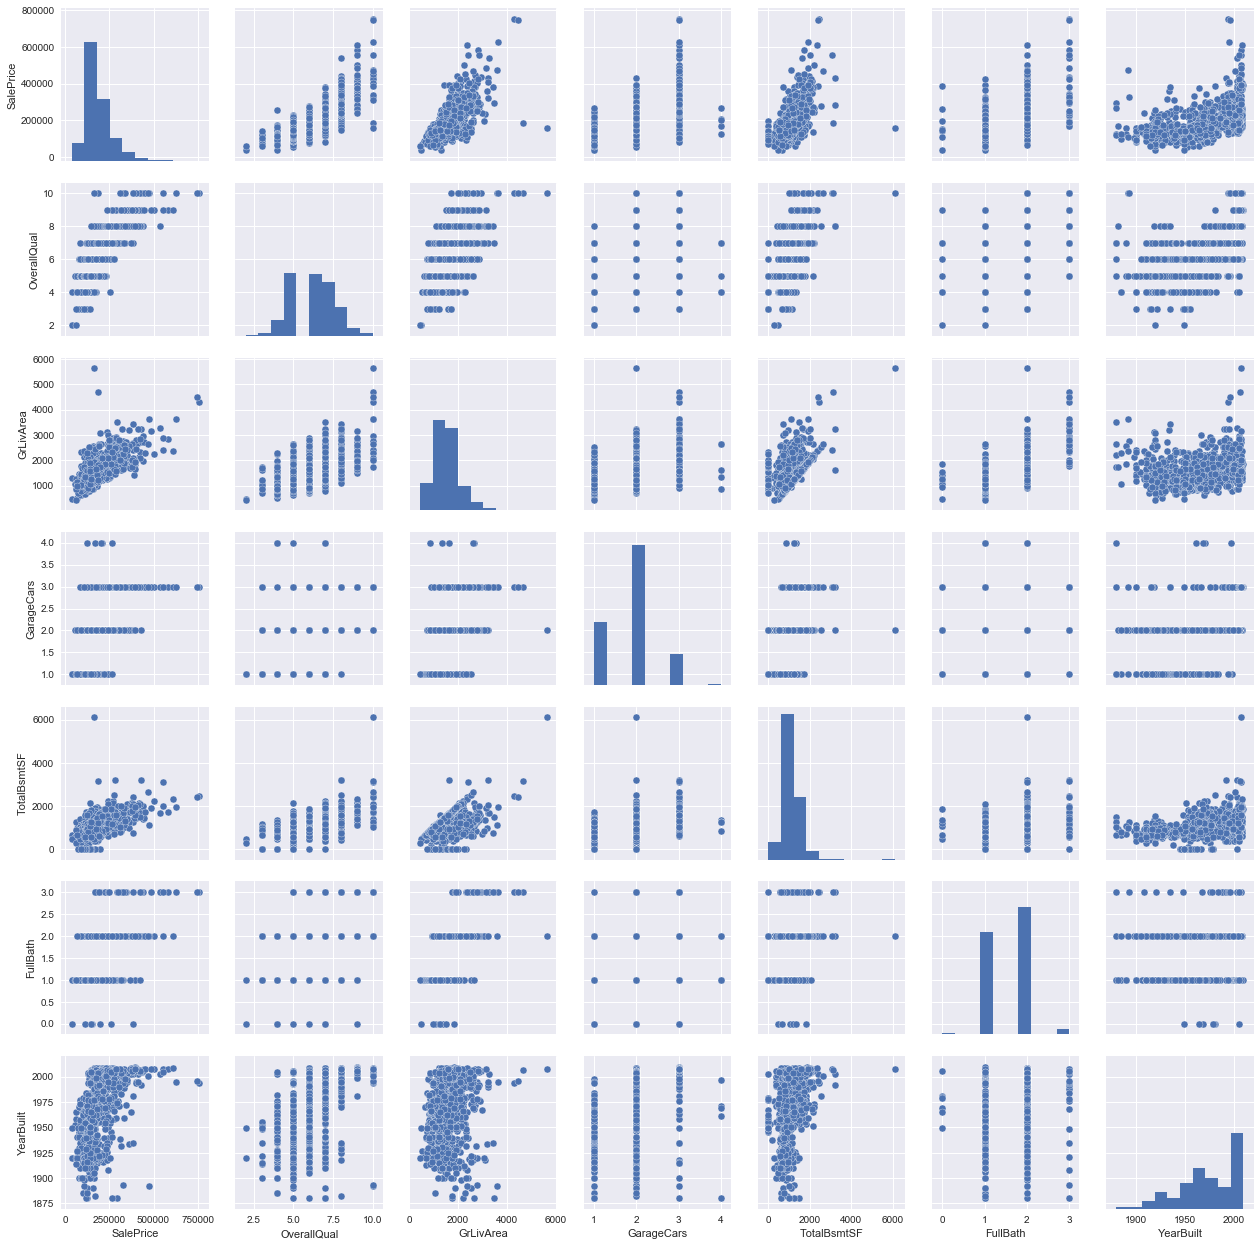

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [18]:
train.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [19]:
train.groupby('Alley').apply(lambda x : x.SalePrice.mean())

Alley
Grvl    126402.418605
Pave    167529.578947
dtype: float64

In [20]:
train.groupby('Utilities').apply(lambda x : x.SalePrice.mean())

Utilities
AllPub    185216.694891
NoSeWa    137500.000000
dtype: float64

In [21]:
train.groupby('FireplaceQu').apply(lambda x : x.SalePrice.mean())

FireplaceQu
Ex    337712.500000
Fa    167298.484848
Gd    226689.941176
Po    134460.166667
TA    206786.779221
dtype: float64

In [22]:
train[train['FireplaceQu'].isnull()].SalePrice.mean()

145546.86156351792

In [23]:
train.groupby('FireplaceQu').apply(lambda x : x)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,20.0,RL,75.0,10084.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,307000.0
7,8.0,60.0,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
8,9.0,50.0,RM,51.0,6120.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10.0,190.0,RL,50.0,7420.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1.0,2008.0,WD,Normal,118000.0


In [24]:
train[train['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
26,27,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,134800
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500


In [25]:
train.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40.,  73.,  77.,  64.,
        94., 105.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  86.,  62., 141.,  97.,  54.,  41.,  79., 174.,  99.,  83.,
        43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87., 116.,
       150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  38., 109., 130.,
        67.,  53., 137.,  58., 106., 104.,  42.,  39., 144.,  45., 114.,
       128., 149., 313., 168., 182., 160., 152., 124.,  46.])

Null lot frontage means there is no streets leading up to the property. Hence they are filled with zero

In [26]:
train.LotFrontage.fillna(0, inplace = True)

In [27]:
train.Alley.fillna('No Alley', inplace = True)

In [28]:
train['FireplaceQu'].fillna('NA', inplace = True)
train.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.000000
GarageType  

Null value in all the features below means they are not available. Hence they are filled with 'NA'

In [29]:
train.PoolQC.fillna('NA', inplace = True)
train.Fence.fillna('NA', inplace = True)
train.MiscFeature.fillna('NA', inplace = True)

In [30]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

## Multivariate Analysis

Every attribite is being plotted and mapped with its corresponding regression line. The correlation and standard deviation is calculated. The features are also manipulated by using certain types of transformations. The features having high corelation value and low standard deviation are selected as best features 

In [31]:
def scatter_plot(var):
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice')
#     plt.subplot(1, 2, 2)
    slope, intercept, r_value, p_value, std_err = stats.linregress(train[var], train['SalePrice'])
#     plt.plot(train[var], train['SalePrice', 'o', label='original data')
    plt.plot(train[var], intercept + slope*train[var], 'r', label='fitted line')
    plt.legend()
    plt.show()
    print("correlation-coefficient:", r_value)
    print('Error : ', std_err)

In [66]:
train.FullBath.value_counts(),train.HalfBath.value_counts()

(2    722
 1    581
 3     29
 0      8
 Name: FullBath, dtype: int64, 0    809
 1    522
 2      9
 Name: HalfBath, dtype: int64)

In [67]:
train.groupby(['FullBath','HalfBath'])['SalePrice'].agg("mean")

FullBath  HalfBath
0         0           108103.666667
          1           322500.000000
          2           152165.666667
1         0           129835.851485
          1           161313.017341
          2           169237.500000
2         0           208004.166240
          1           229349.574468
          2           195000.000000
3         0           289885.909091
          1           417265.944444
Name: SalePrice, dtype: float64

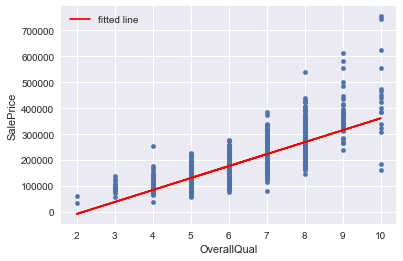

correlation-coefficient: 0.7862116887735794
Error :  980.0358724982929


In [32]:
scatter_plot('OverallQual')

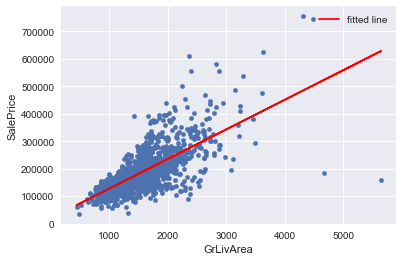

correlation-coefficient: 0.7097949732581491
Error :  2.8914665306081107


In [33]:
scatter_plot('GrLivArea')

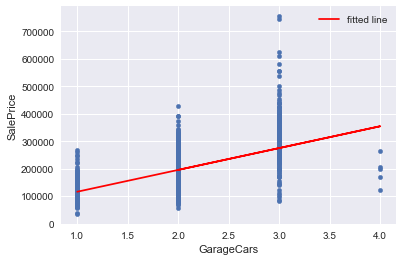

correlation-coefficient: 0.6361177342531756
Error :  2606.2865786485004


In [34]:
scatter_plot('GarageCars')

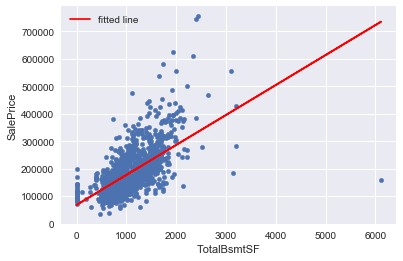

correlation-coefficient: 0.6029808909253057
Error :  3.9021865648442207


In [35]:
scatter_plot('TotalBsmtSF')

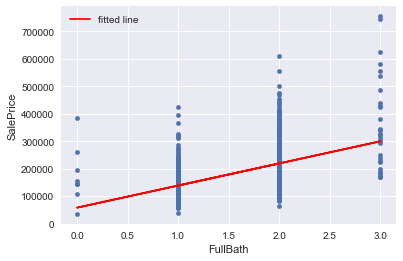

correlation-coefficient: 0.5586435379553095
Error :  3230.0338590868787


In [36]:
scatter_plot('FullBath')

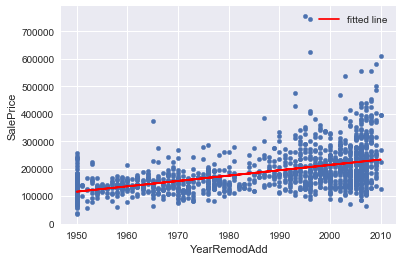

correlation-coefficient: 0.5056729591157846
Error :  89.91261444969679


In [37]:
scatter_plot('YearRemodAdd')

In [38]:
train.drop(train[train['BsmtExposure'].isnull()].index, axis = 0, inplace = True)

In [39]:
sum(train.isnull().sum())

2

In [40]:
train.FireplaceQu = train.FireplaceQu.map(train.groupby('FireplaceQu').apply(lambda x : x.SalePrice.mean()).to_dict())

In [41]:
train.groupby('PoolQC').apply(lambda x : x.SalePrice.mean()).to_dict()

{'Ex': 490000.0, 'Fa': 215500.0, 'Gd': 201990.0, 'NA': 186287.9182295574}

In [42]:
train.PoolQC = train.PoolQC.map(train.groupby('PoolQC').apply(lambda x : x.SalePrice.mean()).to_dict())

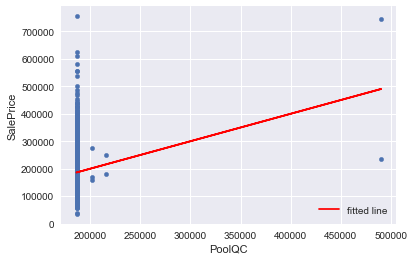

correlation-coefficient: 0.149596568389216
Error :  0.1806905930658535


In [43]:
scatter_plot('PoolQC')

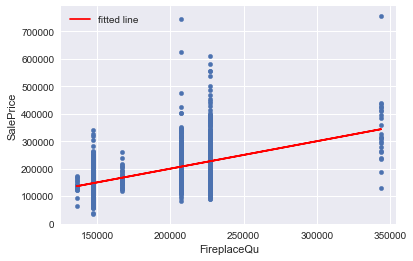

correlation-coefficient: 0.5246745836970559
Error :  0.044357393207931264


In [44]:
scatter_plot('FireplaceQu')

In [45]:
train.Fence = train.Fence.map(train.groupby('Fence').apply(lambda x : x.SalePrice.mean()).to_dict())

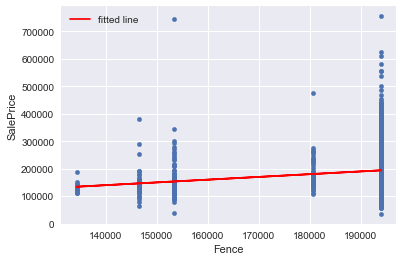

correlation-coefficient: 0.19866483613483957
Error :  0.13486738063464027


In [46]:
scatter_plot('Fence')

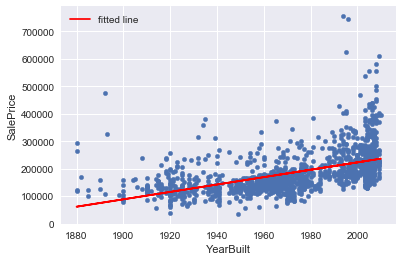

correlation-coefficient: 0.5043015233820382
Error :  62.998891260847394


In [47]:
scatter_plot('YearBuilt')

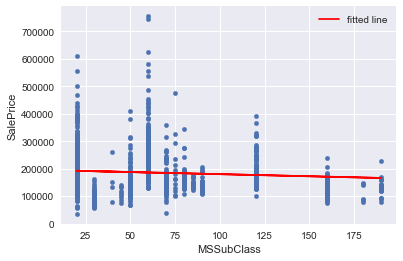

correlation-coefficient: -0.08043069351393019
Error :  52.136502222197365


In [48]:
scatter_plot('MSSubClass')

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 81 columns):
Id               1340 non-null int64
MSSubClass       1340 non-null int64
MSZoning         1340 non-null object
LotFrontage      1340 non-null float64
LotArea          1340 non-null int64
Street           1340 non-null object
Alley            1340 non-null object
LotShape         1340 non-null object
LandContour      1340 non-null object
Utilities        1340 non-null object
LotConfig        1340 non-null object
LandSlope        1340 non-null object
Neighborhood     1340 non-null object
Condition1       1340 non-null object
Condition2       1340 non-null object
BldgType         1340 non-null object
HouseStyle       1340 non-null object
OverallQual      1340 non-null int64
OverallCond      1340 non-null int64
YearBuilt        1340 non-null int64
YearRemodAdd     1340 non-null int64
RoofStyle        1340 non-null object
RoofMatl         1340 non-null object
Exterior1st      1340 non

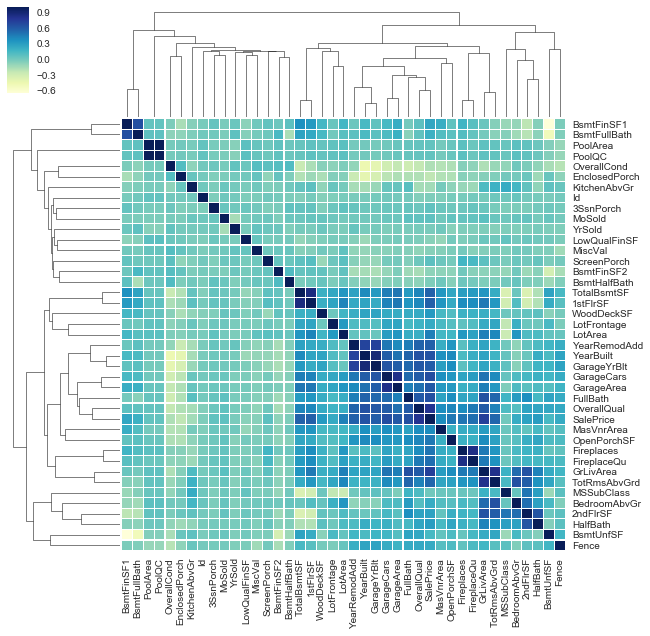

In [50]:
corrmat = train.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

This plot maps the attributes having high correlation values and catagorizes them with the lines shown above

In [68]:
def softplus(x):
    return np.log(1 + np.exp(x))

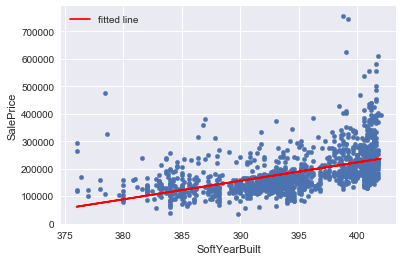

correlation-coefficient: 0.5043015233820378
Error :  314.9944563042369


In [52]:
train['SoftYearBuilt'] = softplus(train['YearBuilt'])
scatter_plot('SoftYearBuilt')

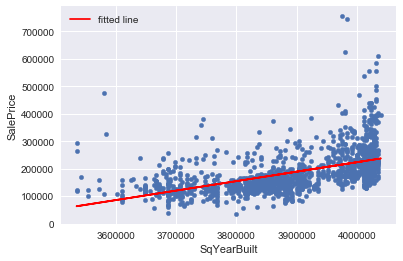

correlation-coefficient: 0.5065342962584091
Error :  0.01602138770165849


In [53]:
train['SqYearBuilt'] = (train['YearBuilt'])**2
scatter_plot('SqYearBuilt')

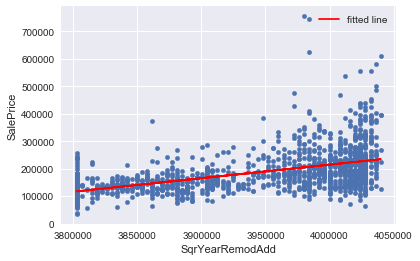

correlation-coefficient: 0.5017139234027898
Error :  0.023216222491768024


In [54]:
train['SqrYearRemodAdd'] = train['YearRemodAdd']**2
scatter_plot('SqrYearRemodAdd')

In [55]:
train.Alley = train.Alley.map(train.groupby('Alley').apply(lambda x : x.SalePrice.mean()).to_dict())
train.Utilities = train.Utilities.map(train.groupby('Utilities').apply(lambda x : x.SalePrice.mean()).to_dict())

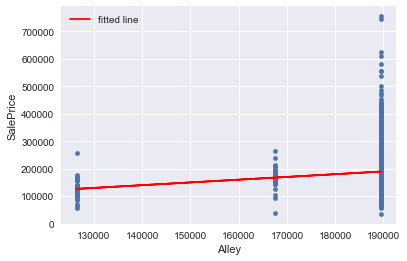

correlation-coefficient: 0.14691273127012028
Error :  0.18406636152725378


In [56]:
scatter_plot('Alley')

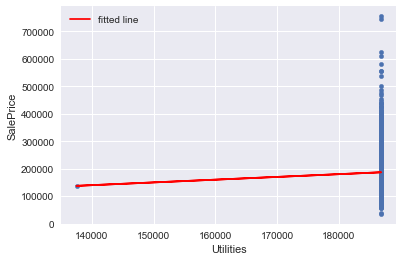

correlation-coefficient: 0.0170887391400792
Error :  1.5995525086743188


In [57]:
scatter_plot('Utilities')

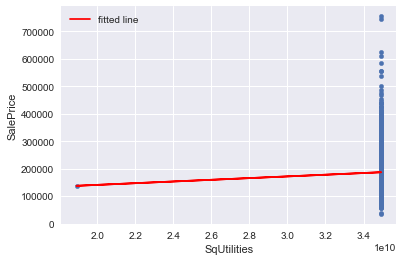

correlation-coefficient: 0.01708873914007925
Error :  4.931459653632937e-06


In [58]:
train['SqUtilities'] = train['Utilities']**2
scatter_plot('SqUtilities')

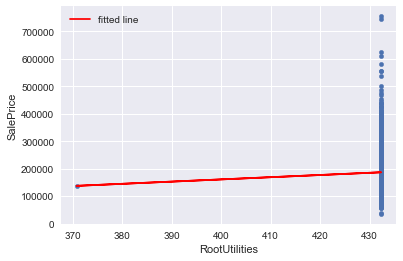

correlation-coefficient: 0.017088739140079308
Error :  1284.5674982450284


In [59]:
train['RootUtilities'] = train['Utilities']**(0.5)
scatter_plot('RootUtilities')

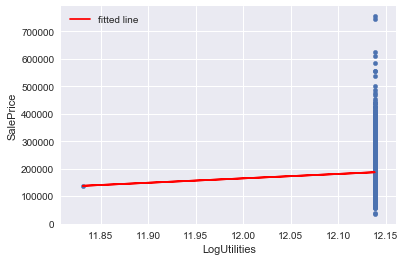

correlation-coefficient: 0.01708873914007924
Error :  257398.10662980258


In [60]:
train['LogUtilities'] = np.log(train['Utilities'])
scatter_plot('LogUtilities')

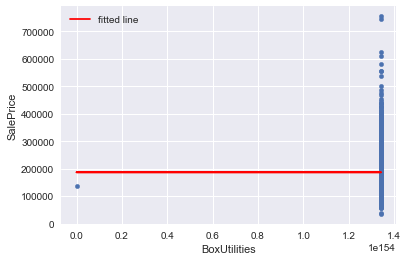

correlation-coefficient: 0.0
Error :  0.0


In [61]:
train['BoxUtilities'], params = stats.boxcox(train['Utilities'])
scatter_plot('BoxUtilities')

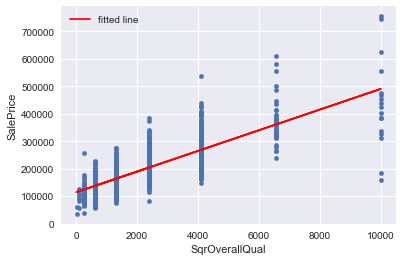

correlation-coefficient: 0.8125413180457963
Error :  0.7383699915102994


In [64]:
train['SqrOverallQual'] = train['OverallQual']**4
scatter_plot('SqrOverallQual')

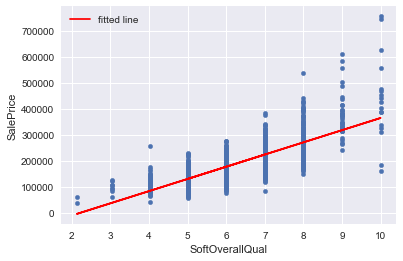

correlation-coefficient: 0.7842880754835734
Error :  1013.7134364352792


In [69]:
train['SoftOverallQual'] = softplus(train['OverallQual'])
scatter_plot('SoftOverallQual')

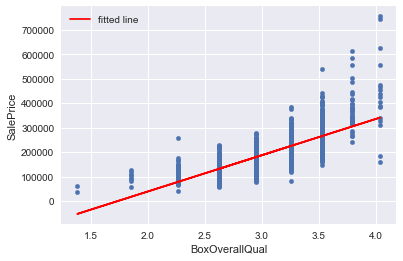

correlation-coefficient: 0.7648547427527496
Error :  3412.3798125245066


In [70]:
train['BoxOverallQual'], params = stats.boxcox(train['OverallQual'] + 1)
scatter_plot('BoxOverallQual')

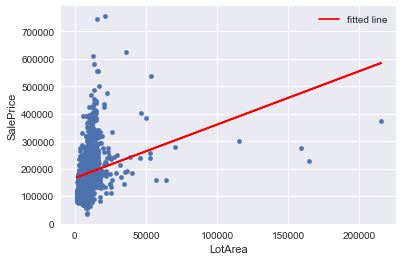

correlation-coefficient: 0.25461900750884175
Error :  0.2019510991740028


In [71]:
scatter_plot('LotArea')

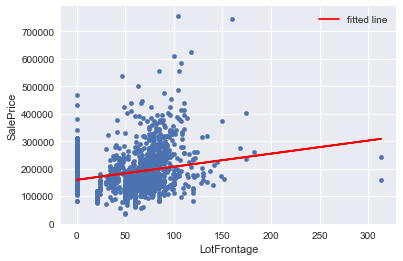

correlation-coefficient: 0.21251910115096762
Error :  59.927615578733416


In [72]:
scatter_plot('LotFrontage')

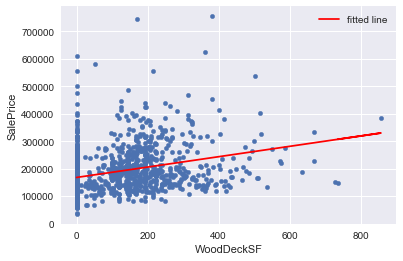

correlation-coefficient: 0.30501514131517016
Error :  16.115421253734617


In [73]:
scatter_plot('WoodDeckSF')

In [94]:
train['LotGroup'] = train.LotArea * train.LotFrontage

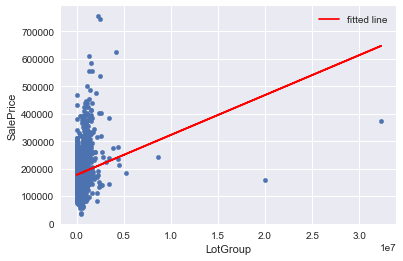

correlation-coefficient: 0.21706784068869203
Error :  0.0017870458212396988


In [95]:
scatter_plot('LotGroup')

In [98]:
train['LotArea'].corr(train['LotFrontage'])

0.09844456987523434